### Clothing people Review

In [1]:
import pandas as pd
import numpy as np

In [15]:
review = pd.read_csv('Reddit_Data.csv')

In [16]:
review.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
review.info

<bound method DataFrame.info of                                            clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37249 rows x 2 columns]>

In [5]:
review.describe()

,category
count,37249.000000
mean,0.202771
std,0.778515
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

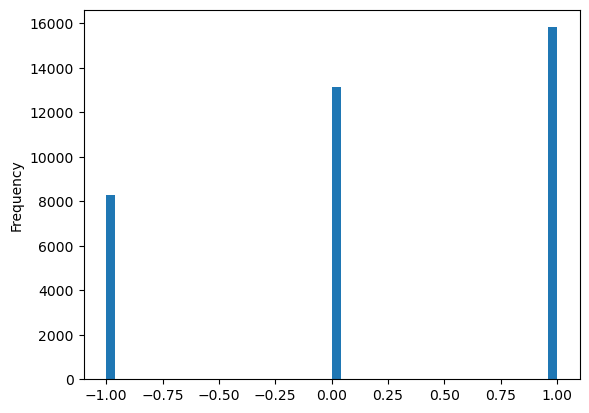

In [7]:
review['category'].plot(kind='hist',bins= 50)

In [8]:
review['clean_comment'][2]

'seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg '

In [17]:
review['category'].value_counts()

 1    15830
 0    13142
-1     8277
Name: category, dtype: int64

In [21]:
review['category'] = review['category'].replace(-1, 0)

In [22]:
review['category'].value_counts()

0    21419
1    15830
Name: category, dtype: int64

In [23]:
X = review['clean_comment']
y = review['category']

In [25]:
X.shape,y.shape

((37249,), (37249,))

In [41]:
# Remove punctuations
X = X.str.replace('[^\w\s]','')

C:\Users\PRITAM VERMA\AppData\Local\Temp\ipykernel_9672\3922474379.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace('[^\w\s]','')


In [44]:
X.head(3)

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
Name: clean_comment, dtype: object

In [45]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PRITAM
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [57]:
stemming = PorterStemmer()

corpus =[]
for i in X:
    a = str(i).split()
    a = [stemming.stem(word) for word in a if word not in stopwords.words('english')]
    a = " ".join(a)
    corpus.append(a)
        

In [58]:
corpus

['famili mormon never tri explain still stare puzzl time time like kind strang creatur nonetheless come admir patienc calm equanim accept compass develop thing buddhism teach',
 'buddhism much lot compat christian especi consid sin suffer almost thing suffer caus want thing want go get thing wrong way christian would mean want thing coincid god want thing coincid without aid jesu buddhism could also seen proof god mighti omnipot certainli christian lucki one christ side everyon els well mani christian believ god grace salvat buddhism god way show grace upon other would also help studi thing jesu said see buddha made similar claim rich man get heaven joke basic advoc rid materi possess fact distinctli rememb jesu make someon cri someon ask achiev salvat jesu repli live like buddhist roughli translat also point buddha rare spoke anyth god theori person knew well enough leav jesu moham came later rememb conflict differ opinion educ fun involv enlighten easier teach someth prove right like

In [59]:
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot

In [61]:
vocab_size = 5000
onehot = [one_hot(words,vocab_size) for words in corpus]
onehot

[[865,
  1502,
  2980,
  2912,
  3044,
  2924,
  701,
  2338,
  3664,
  3664,
  2068,
  4919,
  2295,
  4068,
  1550,
  4847,
  2132,
  1356,
  855,
  3995,
  1141,
  3503,
  4687,
  4681,
  2014,
  874],
 [2014,
  3162,
  3668,
  140,
  4207,
  4296,
  4738,
  4053,
  1546,
  4032,
  4681,
  1546,
  574,
  2965,
  4681,
  2965,
  4112,
  4292,
  4681,
  4565,
  156,
  4207,
  2139,
  2785,
  2965,
  4681,
  1037,
  1801,
  2965,
  4681,
  1037,
  1850,
  1542,
  2437,
  2014,
  1361,
  415,
  3421,
  1196,
  1801,
  967,
  2184,
  3924,
  4207,
  2710,
  3615,
  4744,
  1085,
  1376,
  1145,
  4353,
  3839,
  4207,
  2379,
  1801,
  276,
  1551,
  2014,
  1801,
  156,
  3595,
  276,
  2568,
  1430,
  2139,
  415,
  738,
  2433,
  4681,
  2437,
  2516,
  4110,
  325,
  4943,
  2313,
  2595,
  2285,
  1280,
  4292,
  4757,
  3429,
  4965,
  2975,
  3219,
  1404,
  370,
  1288,
  2540,
  2688,
  2437,
  1776,
  2572,
  4795,
  2572,
  1841,
  103,
  1551,
  2437,
  829,
  262,
  2068,
  

In [87]:
from tensorflow.keras.layers import Embedding,Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [84]:
padding = pad_sequences(onehot,maxlen=200,padding='pre')
padding

array([[   0,    0,    0, ..., 4681, 2014,  874],
       [   0,    0,    0, ..., 2068, 3516, 3327],
       [   0,    0,    0, ..., 3615, 2980, 2725],
       ...,
       [   0,    0,    0, ..., 3223, 3206, 1068],
       [   0,    0,    0, ...,    0, 3357, 2014],
       [   0,    0,    0, ..., 4670,  434, 1552]])

In [85]:
padding.shape

(37249, 200)

In [86]:
y.shape

(37249,)

In [94]:
model = Sequential()

model.add(Embedding(vocab_size,200,input_length=200))
model.add(LSTM(400))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss='binary_crossentropy',optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 200)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 400)               961600    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1,962,001
Trainable params: 1,962,001
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
X_final = np.array(padding)
y_final = np.array(y)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [95]:
model.fit(X_train,y_train,epochs=50,batch_size=10,validation_data=(X_test,y_test))



'''I have to stop the traning because it's taking approx 45 minutes for 1 epochs 
and according to my model it would take 2250 minutes(~ 1.5 Days)'''

Epoch 1/50
 431/2980 [===>..........................] - ETA: 42:47 - loss: 0.5832

KeyboardInterrupt: 